c:\Users\Darkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Darkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Darkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Darkm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Darkm\AppData\Local

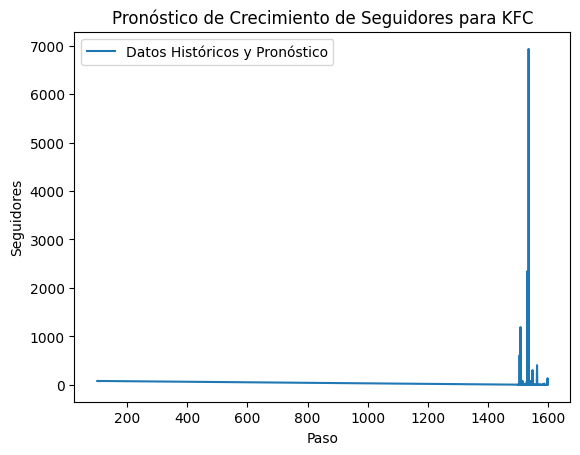

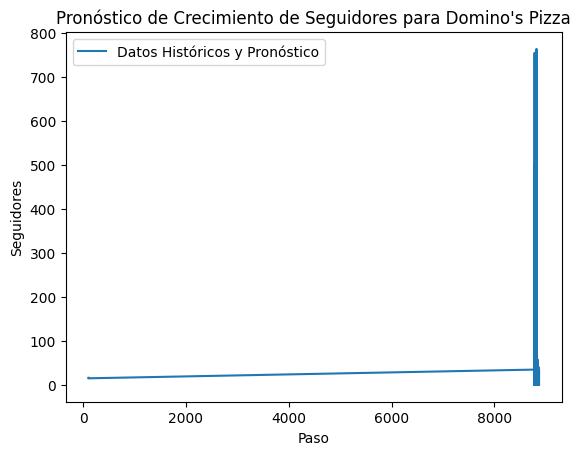

In [15]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Cargar el dataset "Restaurant Scrapped Clean"
restaurant_data = pd.read_csv("Restaurant Scrapped Clean.csv")

# Filtrar los datos para incluir solo observaciones relacionadas con KFC y Domino's Pizza
kfc_data = restaurant_data[restaurant_data['Restaurant'] == 'KFC'].copy()
dominos_data = restaurant_data[restaurant_data['Restaurant'] == "Domino's Pizza"].copy()

# Función para extraer seguidores de la columna Metadata
def extract_followers(metadata):
    if pd.isna(metadata):
        return 0
    else:
        parts = metadata.split(',')
        if len(parts) >= 2:
            followers = int(parts[1].split()[0])
            return followers
        else:
            return 0

# Aplicar la función para extraer seguidores
kfc_data['Followers'] = kfc_data['Metadata'].apply(extract_followers)
dominos_data['Followers'] = dominos_data['Metadata'].apply(extract_followers)

# Modelado de Series Temporales para KFC
kfc_model = ARIMA(kfc_data['Followers'], order=(1,1,1))
kfc_model_fit = kfc_model.fit()
kfc_forecast = kfc_model_fit.forecast(steps=10)

# Modelado de Series Temporales para Domino's Pizza
dominos_model = ARIMA(dominos_data['Followers'], order=(1,1,1))
dominos_model_fit = dominos_model.fit()
dominos_forecast = dominos_model_fit.forecast(steps=10)

# Combina los datos históricos con los pronósticos
kfc_all_data = pd.concat([kfc_data['Followers'], kfc_forecast])
dominos_all_data = pd.concat([dominos_data['Followers'], dominos_forecast])

# Gráficos para KFC
plt.plot(kfc_all_data.index, kfc_all_data, label='Datos Históricos y Pronóstico')
plt.xlabel('Paso')
plt.ylabel('Seguidores')
plt.title('Pronóstico de Crecimiento de Seguidores para KFC')
plt.legend()
plt.savefig('kfc_forecast.png')
plt.show()

# Gráficos para Domino's Pizza
plt.plot(dominos_all_data.index, dominos_all_data, label='Datos Históricos y Pronóstico')
plt.xlabel('Paso')
plt.ylabel('Seguidores')
plt.title('Pronóstico de Crecimiento de Seguidores para Domino\'s Pizza')
plt.legend()
plt.savefig('dominos_forecast.png')
plt.show()


In [ ]:
pip install statsmodels
